<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-18 20:15:29.822068


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

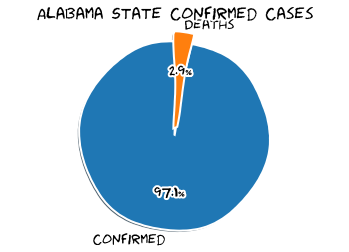

Alabama State Total Population
4887871
Alabama State Confirmed
27312 (0.5587708840924812% of population)
Alabama State Deaths
790 (2.8925014645577036% of confirmed)



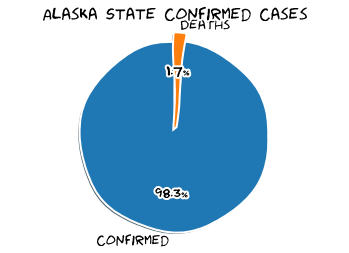

Alaska State Total Population
737438
Alaska State Confirmed
695 (0.09424521112283338% of population)
Alaska State Deaths
12 (1.7266187050359711% of confirmed)



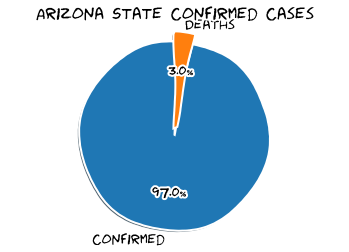

Arizona State Total Population
7171646
Arizona State Confirmed
40937 (0.5708173549001163% of population)
Arizona State Deaths
1248 (3.048586852969197% of confirmed)



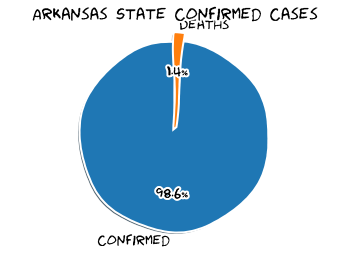

Arkansas State Total Population
3013825
Arkansas State Confirmed
13606 (0.4514528879414034% of population)
Arkansas State Deaths
197 (1.4478906364839041% of confirmed)



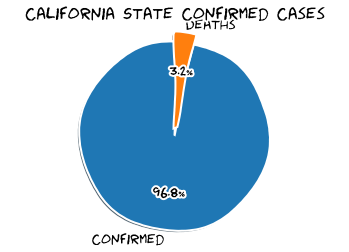

California State Total Population
39557045
California State Confirmed
163446 (0.41319062129135276% of population)
California State Deaths
5282 (3.231648373163002% of confirmed)



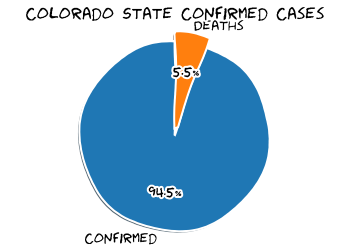

Colorado State Total Population
5695564
Colorado State Confirmed
29656 (0.5206859232904766% of population)
Colorado State Deaths
1631 (5.499730240086323% of confirmed)



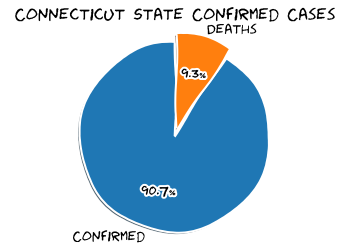

Connecticut State Total Population
3572665
Connecticut State Confirmed
45429 (1.271571781849124% of population)
Connecticut State Deaths
4219 (9.287019304849325% of confirmed)



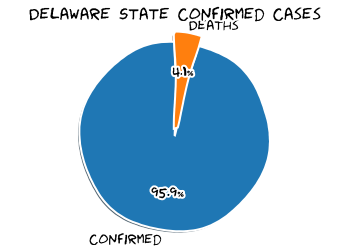

Delaware State Total Population
967171
Delaware State Confirmed
10444 (1.0798504090796766% of population)
Delaware State Deaths
426 (4.078896974339333% of confirmed)



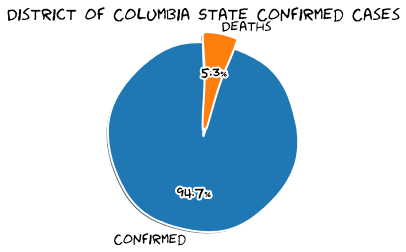

District of Columbia State Total Population
702455
District of Columbia State Confirmed
9903 (1.4097700208554285% of population)
District of Columbia State Deaths
527 (5.321619711198626% of confirmed)



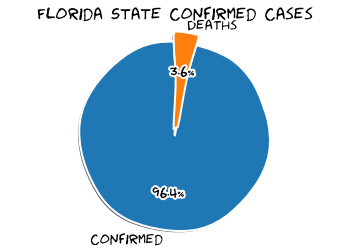

Florida State Total Population
21299325
Florida State Confirmed
82719 (0.38836441999922533% of population)
Florida State Deaths
3018 (3.6484967178036487% of confirmed)



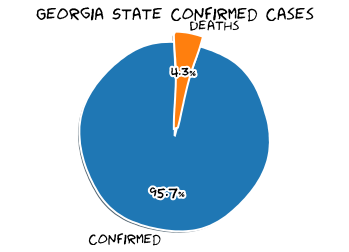

Georgia State Total Population
10519475
Georgia State Confirmed
60030 (0.570655854973751% of population)
Georgia State Deaths
2575 (4.289521905713809% of confirmed)



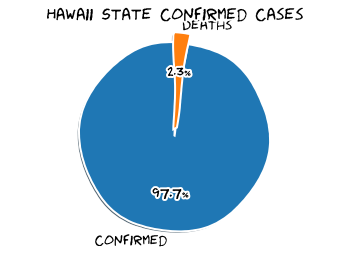

Hawaii State Total Population
1420491
Hawaii State Confirmed
744 (0.052376255815770746% of population)
Hawaii State Deaths
17 (2.28494623655914% of confirmed)



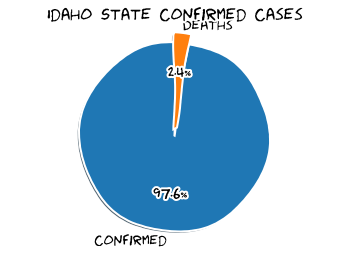

Idaho State Total Population
1754208
Idaho State Confirmed
3632 (0.20704500264506828% of population)
Idaho State Deaths
88 (2.4229074889867843% of confirmed)



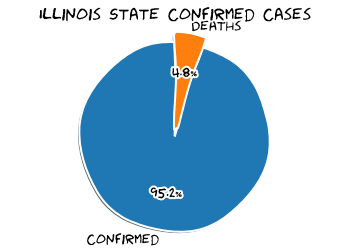

Illinois State Total Population
12741080
Illinois State Confirmed
134185 (1.0531681772659773% of population)
Illinois State Deaths
6485 (4.832879979133286% of confirmed)



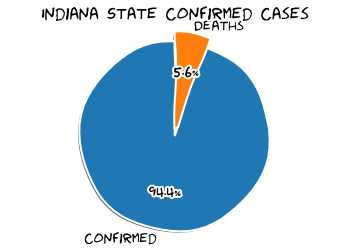

Indiana State Total Population
6691878
Indiana State Confirmed
41013 (0.612877281982726% of population)
Indiana State Deaths
2289 (5.581157194060419% of confirmed)



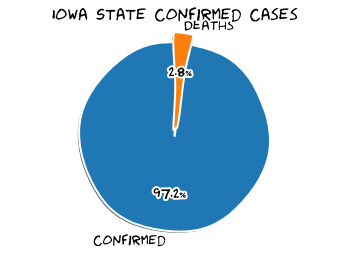

Iowa State Total Population
3156145
Iowa State Confirmed
24460 (0.7749960790774821% of population)
Iowa State Deaths
675 (2.759607522485691% of confirmed)



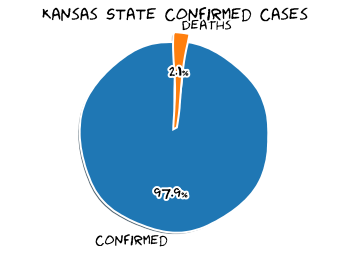

Kansas State Total Population
2911510
Kansas State Confirmed
11692 (0.4015785623267652% of population)
Kansas State Deaths
250 (2.1382141635306193% of confirmed)



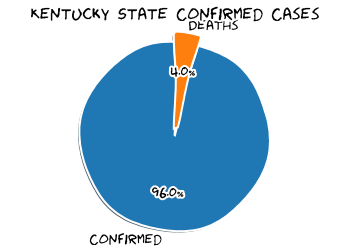

Kentucky State Total Population
4468402
Kentucky State Confirmed
12995 (0.2908198501388192% of population)
Kentucky State Deaths
518 (3.9861485186610235% of confirmed)



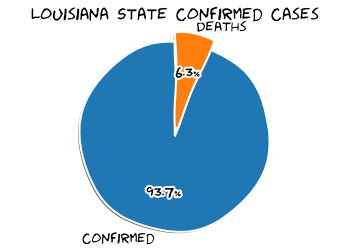

Louisiana State Total Population
4659978
Louisiana State Confirmed
48634 (1.0436529957866754% of population)
Louisiana State Deaths
3062 (6.296006908746968% of confirmed)



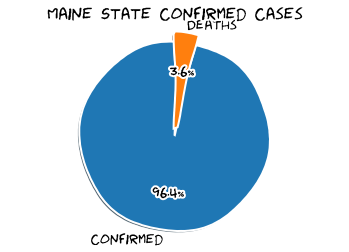

Maine State Total Population
1338404
Maine State Confirmed
2836 (0.21189416648485807% of population)
Maine State Deaths
102 (3.596614950634697% of confirmed)



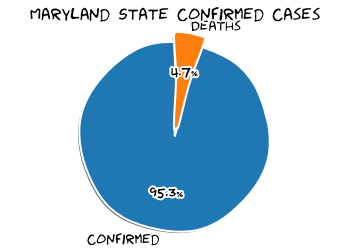

Maryland State Total Population
6042718
Maryland State Confirmed
63229 (1.0463668832469097% of population)
Maryland State Deaths
2990 (4.728842777839282% of confirmed)



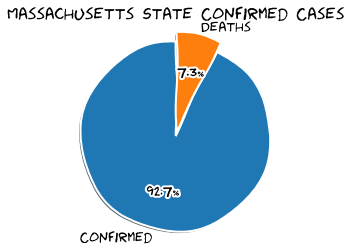

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
106151 (1.537941299151902% of population)
Massachusetts State Deaths
7733 (7.284905464856667% of confirmed)



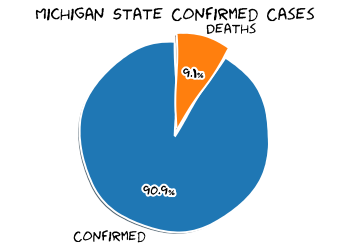

Michigan State Total Population
9995915
Michigan State Confirmed
66497 (0.6652417512553879% of population)
Michigan State Deaths
6036 (9.077101222611546% of confirmed)



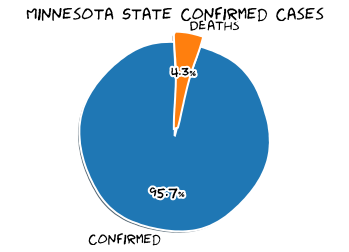

Minnesota State Total Population
5611179
Minnesota State Confirmed
31296 (0.5577437469023889% of population)
Minnesota State Deaths
1357 (4.336017382413088% of confirmed)



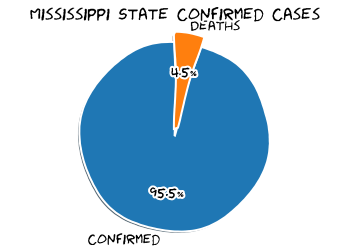

Mississippi State Total Population
2986530
Mississippi State Confirmed
20472 (0.685477795300901% of population)
Mississippi State Deaths
925 (4.518366549433372% of confirmed)



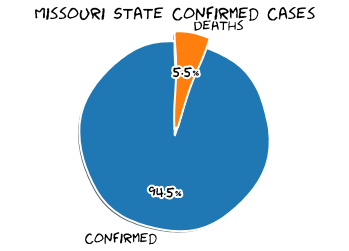

Missouri State Total Population
6126452
Missouri State Confirmed
17131 (0.2796235080271583% of population)
Missouri State Deaths
937 (5.469616484735275% of confirmed)



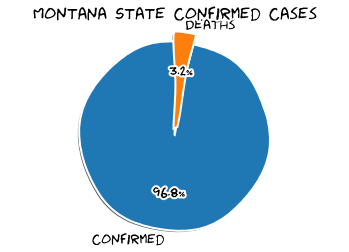

Montana State Total Population
1062305
Montana State Confirmed
630 (0.05930500185916474% of population)
Montana State Deaths
20 (3.1746031746031744% of confirmed)



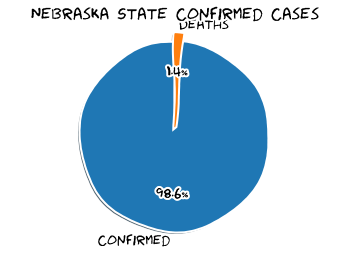

Nebraska State Total Population
1929268
Nebraska State Confirmed
17231 (0.8931366715251589% of population)
Nebraska State Deaths
234 (1.3580175265509835% of confirmed)



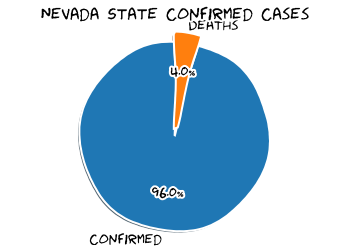

Nevada State Total Population
3034392
Nevada State Confirmed
11854 (0.3906548659500816% of population)
Nevada State Deaths
473 (3.990214273662899% of confirmed)



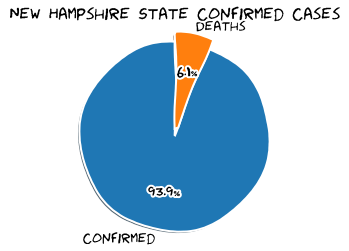

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5436 (0.4007495993241221% of population)
New Hampshire State Deaths
330 (6.070640176600441% of confirmed)



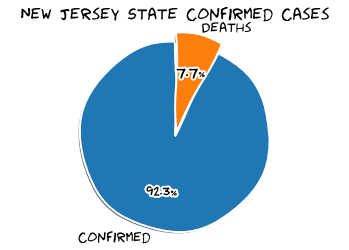

New Jersey State Total Population
8908520
New Jersey State Confirmed
167703 (1.8825012459982131% of population)
New Jersey State Deaths
12835 (7.653411089843354% of confirmed)



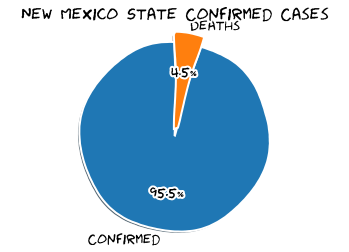

New Mexico State Total Population
2095428
New Mexico State Confirmed
10065 (0.48033146450271735% of population)
New Mexico State Deaths
452 (4.490809736711377% of confirmed)



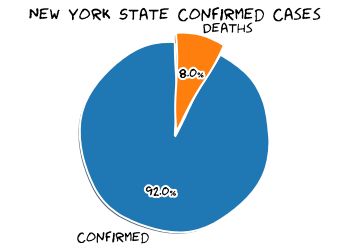

New York State Total Population
19542209
New York State Confirmed
385142 (1.9708212106420517% of population)
New York State Deaths
30939 (8.033141023310883% of confirmed)



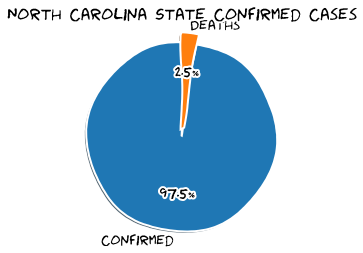

North Carolina State Total Population
10383620
North Carolina State Confirmed
46934 (0.45200036210878286% of population)
North Carolina State Deaths
1181 (2.516299484382324% of confirmed)



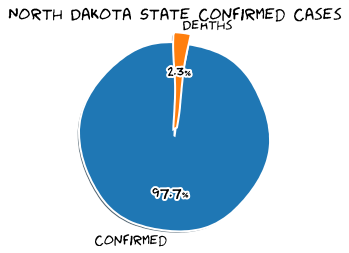

North Dakota State Total Population
760077
North Dakota State Confirmed
3193 (0.4200890172969317% of population)
North Dakota State Deaths
75 (2.348888192922017% of confirmed)



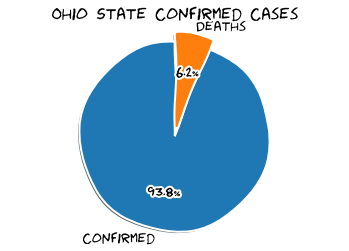

Ohio State Total Population
11689442
Ohio State Confirmed
42422 (0.36290868289521433% of population)
Ohio State Deaths
2611 (6.154825326481542% of confirmed)



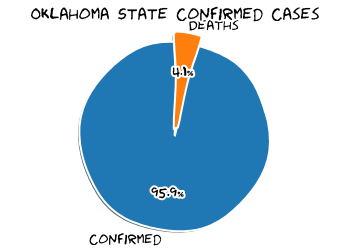

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
8904 (0.22581338086302608% of population)
Oklahoma State Deaths
364 (4.088050314465408% of confirmed)



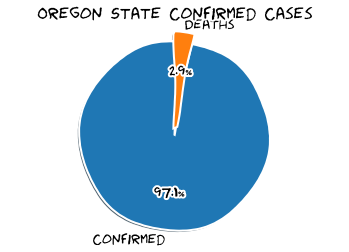

Oregon State Total Population
4190713
Oregon State Confirmed
6218 (0.1483757059956146% of population)
Oregon State Deaths
183 (2.9430685107751686% of confirmed)



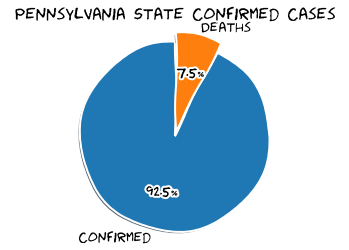

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
84289 (0.6581448045062644% of population)
Pennsylvania State Deaths
6319 (7.49682639490325% of confirmed)



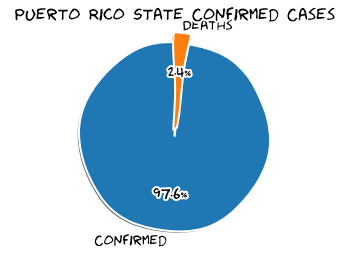

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
6111 (0.19125844677860496% of population)
Puerto Rico State Deaths
147 (2.405498281786942% of confirmed)



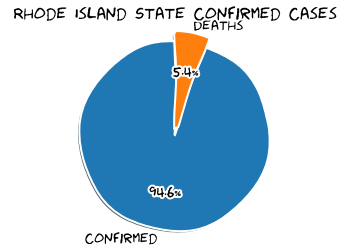

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
16213 (1.5334124645919145% of population)
Rhode Island State Deaths
876 (5.403071609202492% of confirmed)



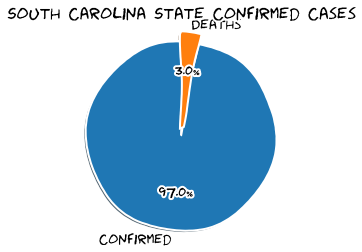

South Carolina State Total Population
5084127
South Carolina State Confirmed
20556 (0.4043172013602336% of population)
South Carolina State Deaths
617 (3.001556723097879% of confirmed)



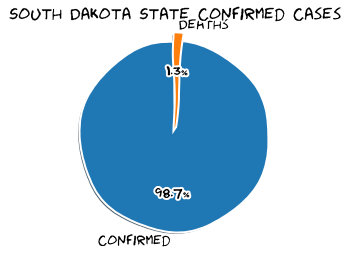

South Dakota State Total Population
882235
South Dakota State Confirmed
6050 (0.6857583296967362% of population)
South Dakota State Deaths
78 (1.2892561983471074% of confirmed)



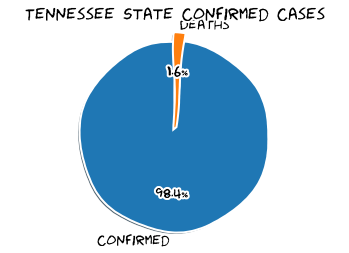

Tennessee State Total Population
6770010
Tennessee State Confirmed
32114 (0.47435675870493543% of population)
Tennessee State Deaths
498 (1.5507255402628137% of confirmed)



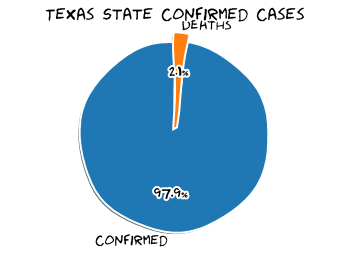

Texas State Total Population
28701845
Texas State Confirmed
97699 (0.3403927517551572% of population)
Texas State Deaths
2089 (2.138199981576065% of confirmed)



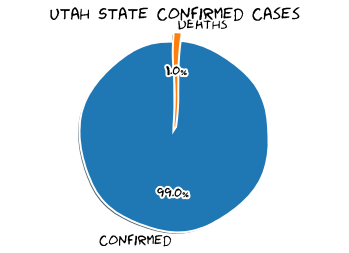

Utah State Total Population
3161105
Utah State Confirmed
15344 (0.4853998839013573% of population)
Utah State Deaths
149 (0.9710636079249219% of confirmed)



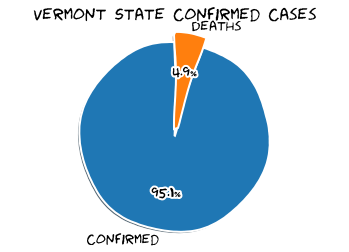

Vermont State Total Population
626299
Vermont State Confirmed
1130 (0.18042500467029327% of population)
Vermont State Deaths
55 (4.867256637168142% of confirmed)



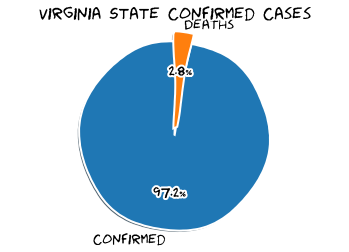

Virginia State Total Population
8517685
Virginia State Confirmed
55944 (0.6567981793175024% of population)
Virginia State Deaths
1583 (2.8296153296153297% of confirmed)



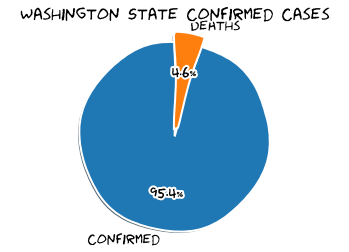

Washington State Total Population
7535591
Washington State Confirmed
26784 (0.35543330310787835% of population)
Washington State Deaths
1226 (4.577359617682198% of confirmed)



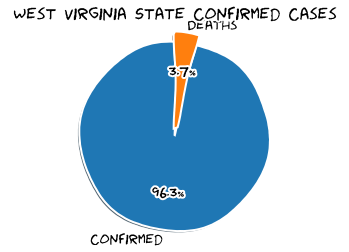

West Virginia State Total Population
1805832
West Virginia State Confirmed
2376 (0.1315737012080858% of population)
West Virginia State Deaths
88 (3.7037037037037033% of confirmed)



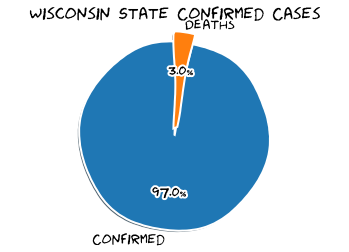

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
23454 (0.4034355493906668% of population)
Wisconsin State Deaths
712 (3.0357295130894517% of confirmed)



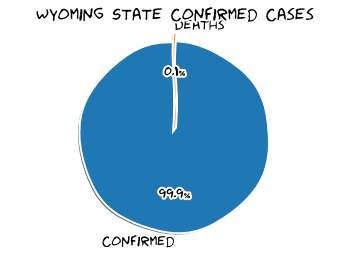

Wyoming State Total Population
577737
Wyoming State Confirmed
1114 (0.19282130104182352% of population)
Wyoming State Deaths
1 (0.08976660682226212% of confirmed)



In [10]:
for i in states:
    state_details(i)

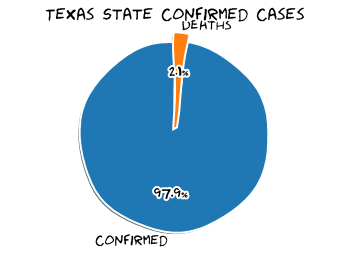

Texas State Total Population
28701845
Texas State Confirmed
97699 (0.3403927517551572% of population)
Texas State Deaths
2089 (2.138199981576065% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
2164497
US Deaths
117540

New York City Confirmed
210941
New York City Deaths
22171

Philippines Confirmed
27799
Philippines Deaths
1116



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 8410682},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 450835},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-06-18T19:33:26.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 4115294},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-06-18 04:33:18,34.22333378,-82.46170658,73,0,0,73,"Abbeville, South Carolina, US",297.63118196273496,0.0
1,22001,Acadia,Louisiana,US,2020-06-18 04:33:18,30.2950649,-92.41419698,625,32,0,593,"Acadia, Louisiana, US",1007.3333870577807,5.12
2,51001,Accomack,Virginia,US,2020-06-18 04:33:18,37.76707161,-75.63234615,1018,14,0,1004,"Accomack, Virginia, US",3150.1423443495482,1.37524557956778
3,16001,Ada,Idaho,US,2020-06-18 04:33:18,43.4526575,-116.24155159999998,986,22,0,964,"Ada, Idaho, US",204.7397458818448,2.231237322515213
4,19001,Adair,Iowa,US,2020-06-18 04:33:18,41.33075609,-94.47105874,12,0,0,12,"Adair, Iowa, US",167.78523489932886,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,,,,West Bank and Gaza,2020-06-18 04:33:18,31.9522,35.2332,555,3,415,137,West Bank and Gaza,10.879332326554039,0.5405405405405406
3743,,,,Western Sahara,2020-06-18 04:33:18,24.2155,-12.8858,9,1,8,0,Western Sahara,1.5067048365225253,11.11111111111111
3744,,,,Yemen,2020-06-18 04:33:18,15.552726999999999,48.516388,902,244,271,387,Yemen,3.0242103123023534,27.0509977827051
3745,,,,Zambia,2020-06-18 04:33:18,-13.133897,27.849332,1412,11,1142,259,Zambia,7.680610201634512,0.7790368271954674


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1592490807000,40.767273,-73.971526,210941,0,22171,188770,New York City,36061,"New York City, New York, US",2530.234261,None,None,84036061,USA
1,Illinois,US,1592490807000,41.841448,-87.816588,85858,0,4304,81554,Cook,17031,"Cook, Illinois, US",1667.070208,None,None,84017031,USA
2,California,US,1592490807000,34.308284,-118.228241,77285,0,2993,74292,Los Angeles,06037,"Los Angeles, California, US",769.839389,None,None,84006037,USA
3,New York,US,1592490807000,40.740665,-73.589419,41320,0,2171,39149,Nassau,36059,"Nassau, New York, US",3045.122645,None,None,84036059,USA
4,New York,US,1592490807000,40.883201,-72.801217,40770,0,1958,38812,Suffolk,36103,"Suffolk, New York, US",2761.070865,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,Wyoming,US,1592490807000,43.839612,-104.567488,1,0,0,1,Weston,56045,"Weston, Wyoming, US",14.436264,None,None,84056045,USA
3021,Montana,US,1592490807000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA
3022,Kansas,US,1592490807000,37.559372,-95.743233,1,0,0,1,Wilson,20205,"Wilson, Kansas, US",11.730205,None,None,84020205,USA
3023,Kentucky,US,1592490807000,37.739416,-83.493036,1,0,0,1,Wolfe,21237,"Wolfe, Kentucky, US",13.972335,None,None,84021237,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1592490807000,40.767273,-73.971526,210941,0,22171,188770,New York City,36061,"New York City, New York, US",2530.234261,None,None,84036061,USA
3,New York,US,1592490807000,40.740665,-73.589419,41320,0,2171,39149,Nassau,36059,"Nassau, New York, US",3045.122645,None,None,84036059,USA
4,New York,US,1592490807000,40.883201,-72.801217,40770,0,1958,38812,Suffolk,36103,"Suffolk, New York, US",2761.070865,None,None,84036103,USA
5,New York,US,1592490807000,41.162784,-73.757417,34385,0,1407,32978,Westchester,36119,"Westchester, New York, US",3553.983128,None,None,84036119,USA
24,New York,US,1592490807000,41.150279,-74.025605,13467,0,665,12802,Rockland,36087,"Rockland, New York, US",4133.657060,None,None,84036087,USA
33,New York,US,1592490807000,41.403375,-74.302408,10599,0,473,10126,Orange,36071,"Orange, New York, US",2753.416117,None,None,84036071,USA
67,New York,US,1592490807000,42.762490,-78.730637,6882,0,602,6280,Erie,36029,"Erie, New York, US",749.100361,None,None,84036029,USA
100,New York,US,1592490807000,41.764861,-73.743567,4077,0,145,3932,Dutchess,36027,"Dutchess, New York, US",1385.707197,None,None,84036027,USA
113,New York,US,1592490807000,43.146389,-77.693229,3418,0,247,3171,Monroe,36055,"Monroe, New York, US",460.789733,None,None,84036055,USA
147,New York,US,1592490807000,43.004919,-76.199712,2558,0,174,2384,Onondaga,36067,"Onondaga, New York, US",555.449397,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

385142

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1592490807000,40.767273,-73.971526,210941,0,22171,188770,New York City,36061,"New York City, New York, US",2530.234261,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
59,None,Philippines,1592508806000,12.879721,121.774017,27799,7090,1116,19593,None,None,Philippines,25.368429,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
